# Visualization and analysis of simulated building energy data - Case Study of a Shopping Mall in Phoenix


Here is a data analysis of simulated data from a building energy model like EnergyPlus. We will look at a scenario of a Mall based in Phoenix, United states

The goal of this notebook is to illustrate how to use output files from the EnergyPlus energy simulation engine to get an initial understanding of the Pandas DataFrame and functions



## Case Study -- Shopping Mall Design in Dubai

### The scenario for this analysis ia shopping mall project in Phoenix. ( The name of the mall is not mentioned for data privacy)

- One of the biggest shopping mall of the world
- Floor area is about 500,000 m2
- Number of visitors every year is around 90 million
- Building with tremendously high cooling energy demand

 There will be various decisions to make about which design options to integrate into the design



In [40]:
from IPython.display import Image
Image(url='https://d3qvqlc701gzhm.cloudfront.net/thumbs/69b58db2c484ef66340a178546992316f6748867fe84302b212a6c8d1867f729-750.jpg')


Miguel Martin (PhD student at NUS) has already created several EnergyPlus simulations of a prototype building form and produced results of monthly cooling energy. This set of tutorial videos will cover the ways to analyze the data from those simulations while learning the fundamentals of the Pandas library

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-2.png?raw=true)

The first thing we will do is use the pandas library to load the data set and analyze the data from the 'baseline' energy model. The units of this file is Cooling Energy GWh per month

First, we need to load the `pandas` library and load the `.csv` file


In [6]:
import pandas as pd

We will take a look at all the files in folder using the `ls` command -- this command is typical of a linux command line and the Colab notebook let's use execute these types of commands in addition to Python

In [11]:
directory = "simulation_data/"
file = "Baseline.csv"

In [14]:
baseline_data = pd.read_csv(directory + file, index_col='Month')

In [15]:
baseline_data

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


In [17]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Baseline  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


# Monthly Energy Visualization


### The **Baseline** simulation model is the design of the building with conventional design options. Let's take a look at the energy consumption per month:

<AxesSubplot:title={'center':'Cooling Energy Consumption of Baseline Building in Total GWh'}, xlabel='Months of the Year'>

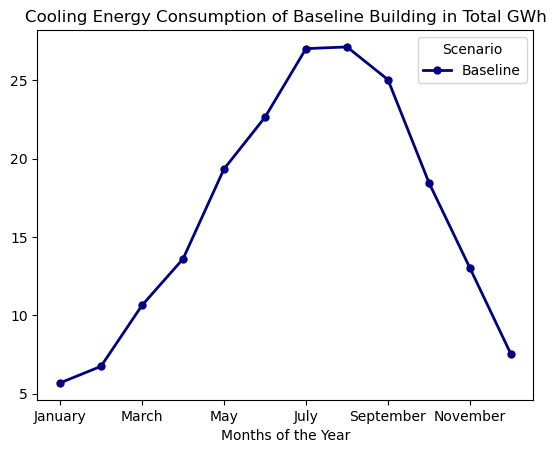

In [19]:
baseline_data.columns.name = 'Scenario'
baseline_data.index.name = 'Months of the Year'
baseline_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

# Overview of Design Option Scenarios

In this analysis, we will consider five additional sets of design options focused on various design options. 




# Compare two files -- Baseline vs. Different Scheduling

First let's take a look at one of the design options - the use of optimized schedules. Instead of the building operating 24/7, the building would have the cooling system on only during operating hours. Let's take a look at this comparison

First, let's get the data from that file

In [20]:
file = "Scenario - Aircon Schedules.csv"

In [21]:
schedule_scenario = pd.read_csv(directory + file, index_col="Month")

In [22]:
schedule_scenario

,Scenario - Aircon Schedules
Month,
January,5.61
February,6.50
March,9.70
April,11.95
May,16.52
June,18.89
July,22.13
August,22.14
September,20.38


Let's take a look at the *Baseline* Scenario again

In [23]:
baseline_data

Scenario,Baseline
Months of the Year,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


Looks like the *Schedule* scenario uses less energy than the baseline - let's confirm this by combining the two DataFrames using the `.concat()` function

In [24]:
combined_data = pd.concat([baseline_data, schedule_scenario], axis=1)

In [25]:
combined_data

,Baseline,Scenario - Aircon Schedules
January,5.69,5.61
February,6.75,6.50
March,10.64,9.70
April,13.60,11.95
May,19.34,16.52
June,22.64,18.89
July,27.02,22.13
August,27.13,22.14
September,25.04,20.38
October,18.47,15.87


<AxesSubplot:title={'center':'Cooling Energy Consumption of Baseline Building in Total GWh'}>

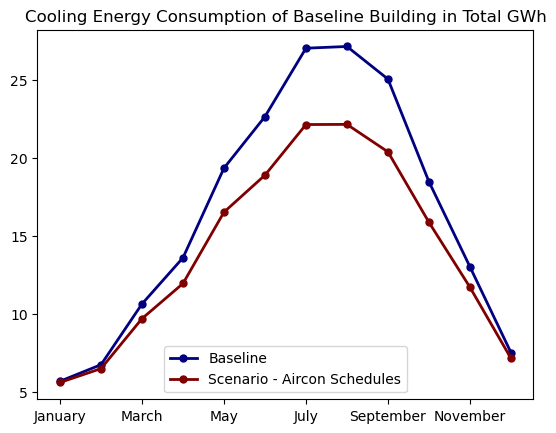

In [26]:
combined_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

# Make New Columns to Find the Difference between the options

Let's use a vector operation to create a new column to find the difference between the columns

In [27]:
combined_data['Difference'] = combined_data['Baseline'] - combined_data['Scenario - Aircon Schedules']

In [28]:
combined_data

,Baseline,Scenario - Aircon Schedules,Difference
January,5.69,5.61,0.08
February,6.75,6.50,0.25
March,10.64,9.70,0.94
April,13.60,11.95,1.65
May,19.34,16.52,2.82
June,22.64,18.89,3.75
July,27.02,22.13,4.89
August,27.13,22.14,4.99
September,25.04,20.38,4.66
October,18.47,15.87,2.60


<AxesSubplot:title={'center':'Difference between Baseline and Improved Schedules in Total GWh'}>

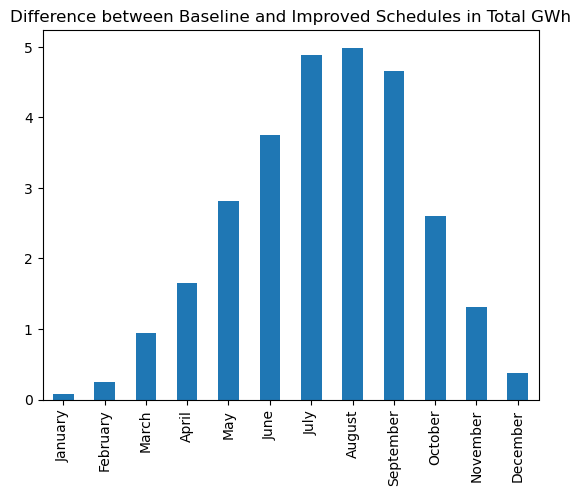

In [29]:
combined_data['Difference'].plot.bar(title='Difference between Baseline and Improved Schedules in Total GWh')

## Define a *function* object to create a new column

Let's say we only care to compare all the months except *July* -- we can define a function to calculate a new column

In [30]:
def get_difference_conditional(monthly_data):
  #print(monthly_data)
  if monthly_data.name == 'July':
    return 0
  else:
    return monthly_data['Baseline'] - monthly_data['Scenario - Aircon Schedules']

In [31]:
combined_data['Difference_NoJuly'] = combined_data.apply(lambda x: get_difference_conditional(x), axis=1)

<AxesSubplot:title={'center':'Difference between Baseline and Improved Schedules in Total GWh'}>

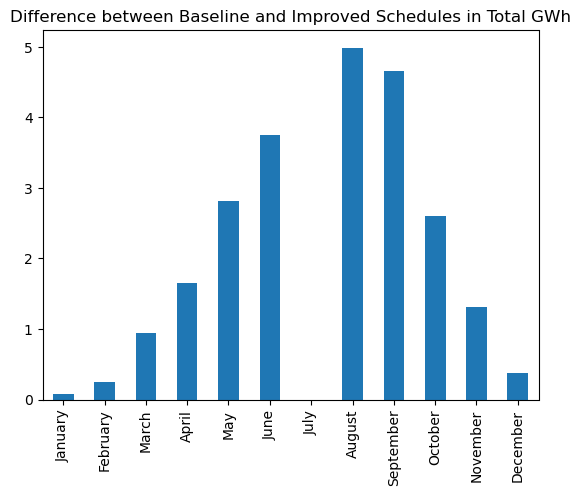

In [32]:
combined_data['Difference_NoJuly'].plot.bar(title='Difference between Baseline and Improved Schedules in Total GWh')

<!-- ## Compare all of the options

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-4.png?raw=true)

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-5.png?raw=true)

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-6.png?raw=true)

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-7.png?raw=true) -->


### Comparing all the scenarios

There are five more `.csv` files that have data from each simulation. We will use a `for` loop to get the data from each file.

Let's take the files out of this list that we want to analyze and put them in a *list* called `list_of_files`

In [33]:
list_of_files = ['Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Rooftop Gardens.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Baseline.csv']

First let's loop through all the filenames just to show that we can

Now we can use the `.append()` function of Python *list* object and the `.concat()` function to loop through and get the data from each building

In [36]:
data_container = []
for filename in list_of_files:
  print(filename)
  df = pd.read_csv(directory + filename, index_col='Month')
  data_container.append(df)

all_data = pd.concat(data_container, axis=1)

Scenario - Aircon Schedules.csv
Scenario - Cool roof.csv
Scenario - Rooftop Gardens.csv
Scenario - Increase Setpoint.csv
Scenario - Low-E Glass.csv
Baseline.csv


In [37]:
all_data

,Scenario - Aircon Schedules,Scenario - Cool roof,Scenario - Rooftop Gardens,Scenario - Increase Setpoint,Scenario - Low-E Glass,Baseline
Month,,,,,,
January,5.61,4.46,6.30,2.73,5.41,5.69
February,6.50,5.39,7.15,3.88,6.48,6.75
March,9.70,8.96,10.90,6.60,10.37,10.64
April,11.95,11.73,13.59,9.37,13.36,13.60
May,16.52,17.28,18.94,14.82,19.14,19.34
June,18.89,20.54,22.12,18.01,22.47,22.64
July,22.13,24.76,26.29,21.98,26.84,27.02
August,22.14,24.97,26.47,22.15,26.91,27.13
September,20.38,22.98,24.63,19.92,24.77,25.04


In [ ]:
all_data.info()

<AxesSubplot:title={'center':'Cooling Energy Consumption of Baseline Building in Total GWh'}, xlabel='Month'>

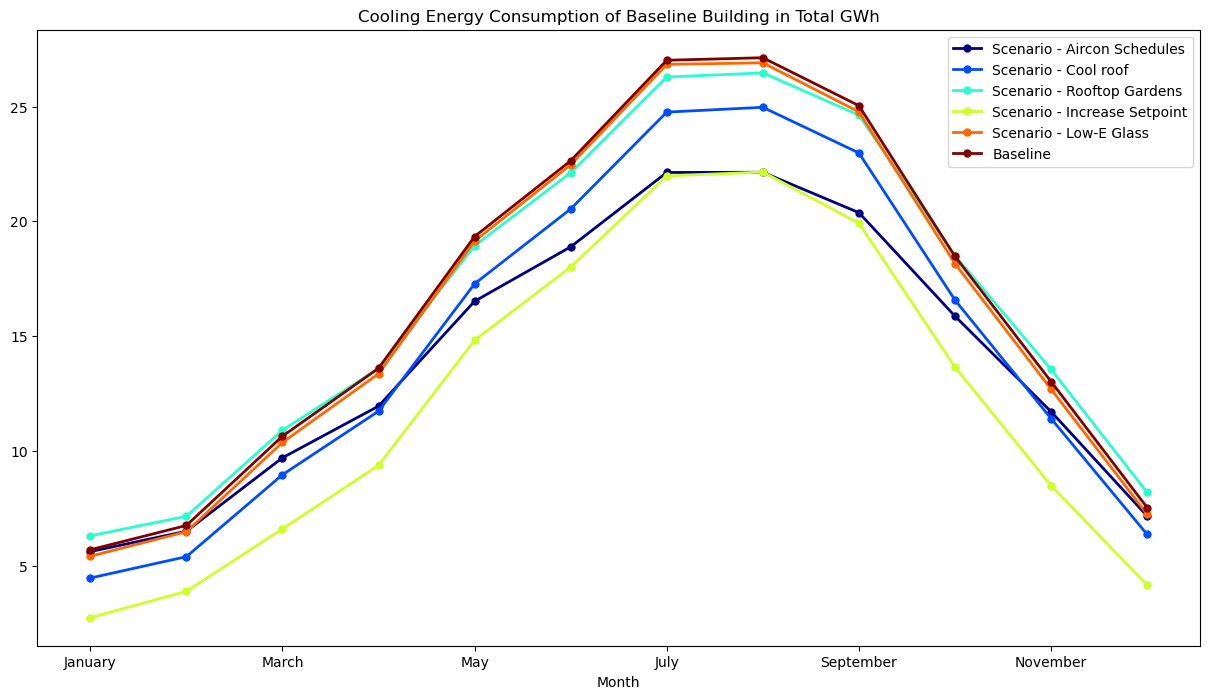

In [38]:
all_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh', figsize=(15,8))

Now we can chain a few functions together to see the total energy consumption reduction from each of the design options

<AxesSubplot:>

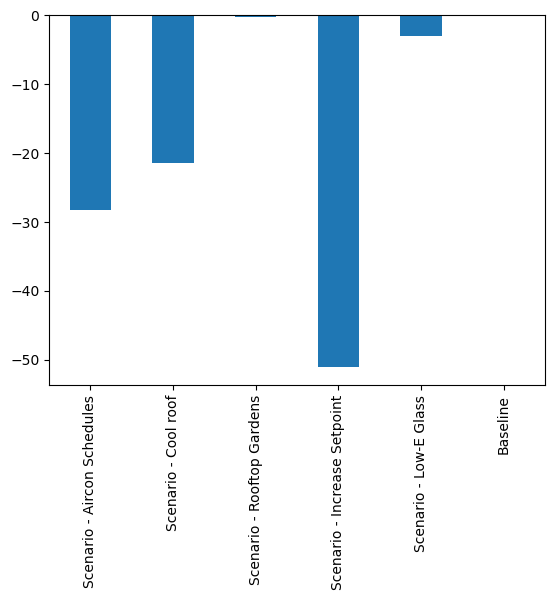

In [39]:
all_data.subtract(all_data['Baseline'], axis=0).sum().plot.bar()

### Conclusion

Turns out that Increasing the setpoing is by far the most effective energy savings option! Schedules are second place and cool roof is third. The Rooftop gardens and Low-E glass seem to have only a bit of impact for this building

#### Reference:
- Data Science for Construction, Architecture and Engineering by Clayton Miller (clayton@nus.edu.sg - miller.clayton@gmail.com):
https://www.edx.org/learn/data-science/the-national-university-of-singapore-data-science-for-construction-architecture-and-engineering
- Simulation files and visualizations created by Miguel Martin (miguel.martin@u.nus.edu.sg)